
# Money laundering detection
by Tan Huee Ming 

## Problem Statement
This project attempts to build machine learning models with the aim to detect money laundering. The objective is not to test every single model out there that exist in the data science domain but some suitable models shall be picked and optimized to evaluate its ability to detect money laundering.
"White box" statistical modeling techniques, such as regression models and decision trees shall be used in this study.

### Measurement of success
This dataset is highly imbalanced where only 0.129% of the data population is Fraud, therefore 'Accuracy' score will not be criteria for success.

AUC ROC is superior because it will give us a score across all False Positive rates that we choose and therefore it is more robust (rather than a specific False Positive rate score e.g. for a high recall).


### Executive Summary
According to the United Nations Office on drugs and crime, up to $3 trillion or 5% of global GDP is laundered around the world each year.

Money laundering is an illegal activity carried out by criminals to turn “dirty” money into what appears to be “clean” money. It involves converting cash or other property derived from illegal activities, into a form which appears to have originated from legitimate sources.

 Money laundering occurs whenever a person attempts to conceal the source, destination, or identity of illegally obtained or acquired money. 

### Dataset
This is a Synthetic Financial Datasets For Fraud Detection. There are 6362620 rows.
Link : https://www.kaggle.com/ntnu-testimon/paysim1

#### Data Columns definition:
- step: Maps a unit of time in the real world. In this case 1 step is 1 hour of time.
- type: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
- amount: amount of the transaction in local currency
- nameOrig: customer who started the transaction
- oldbalanceOrg: initial balance before the transaction
- newbalanceOrig: customer's balance after the transaction.
- nameDest: recipient ID of the transaction.
- oldbalanceDest: initial recipient balance before the transaction.
- newbalanceDest: recipient's balance after the transaction.
- isFraud: identifies a fraudulent transaction (1) and non fraudulent (0)
- isFlaggedFraud: flags illegal attempts to transfer more than 200.000 in a single transaction.

In [66]:
'''importing the required libraries'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
#plt.style.use('bmh')

pd.set_option('display.max_rows', None)

In [67]:
'''Importing the dataset and checking its properties '''

df =  pd.read_csv("AML_dataset.csv")
print(len(df))

6362620


### Data cleaning and EDA

In [68]:
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [69]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [70]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [72]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [73]:
'''Checking for any null values'''
df.isnull().sum().any()

False

In [74]:
'''removing the unwanted features with many unique values'''
df.drop('nameOrig', axis=1, inplace=True)
df.drop('nameDest', axis=1, inplace=True)
df.drop('step', axis =1, inplace =True)
df.drop('isFlaggedFraud', axis=1, inplace=True)

isFraud
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

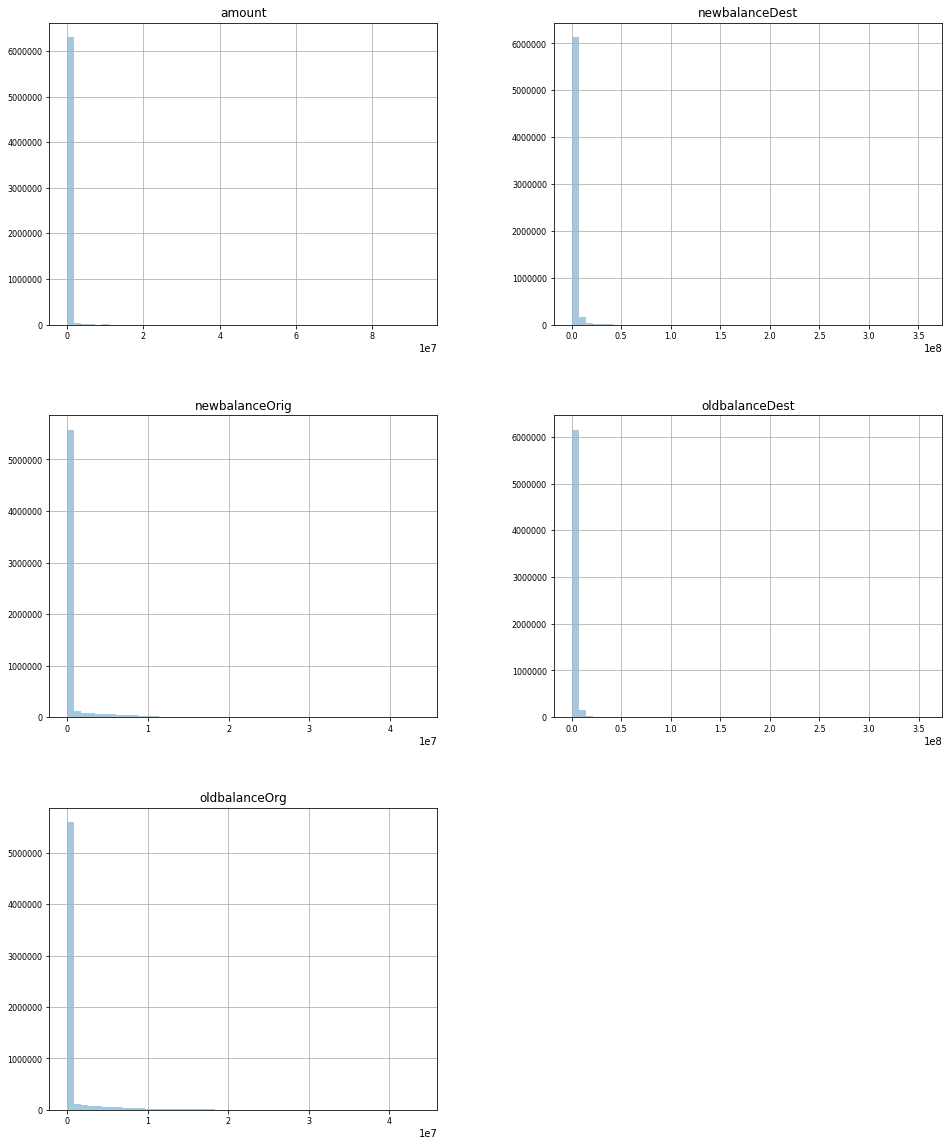

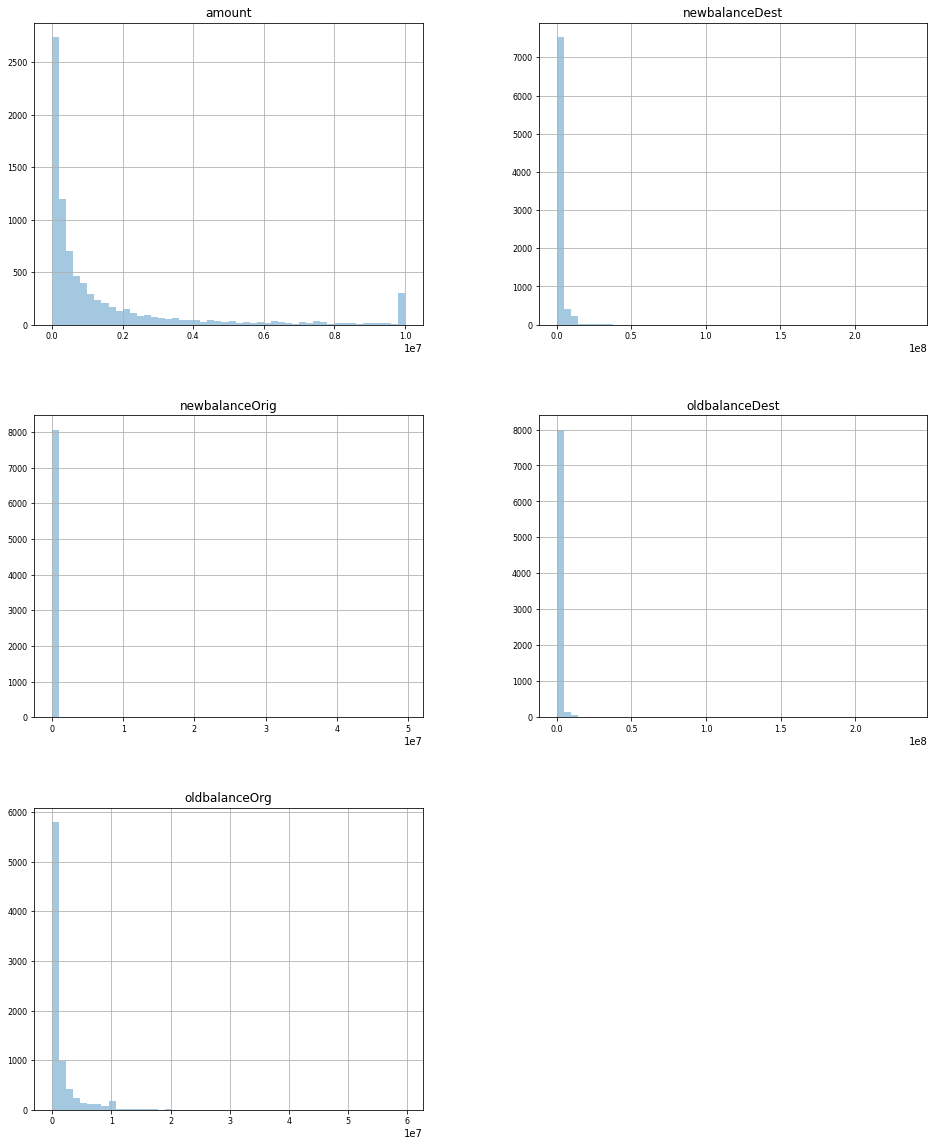

In [75]:
''' Visualize the variables by grouping them by class '''
df.groupby('isFraud').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)

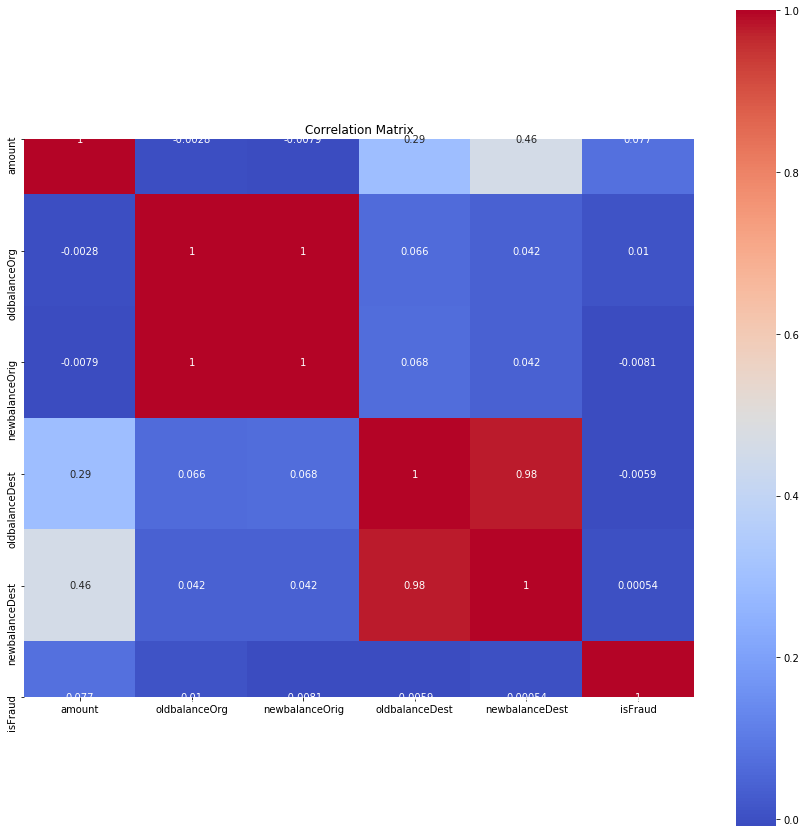

In [76]:
''' co-relation matrix to check multicolinearity between variables '''

correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='coolwarm')

#### oldbalanceDest and newbalanceDest are highly correlated, will remove either one of the variables


In [77]:
'''creating dummy variables for categorical values'''
dum = pd.get_dummies(df['type'])
df1 = pd.concat([df,dum],axis=1)
df1.drop(['type'],axis=1, inplace=True)


0    19984
1       16
Name: isFraud, dtype: int64


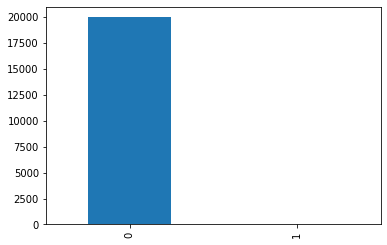

In [78]:
'''checking if target class is balanced or imbalanced'''

df2 = df1.sample(n=20000)
df2.isFraud.value_counts().plot.bar()
print(df2.isFraud.value_counts())



In [79]:
df2.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
5324153,44511.29,389909.21,345397.92,0.00,0.00,0,0,0,0,1,0
2810451,5189.80,26470.46,21280.67,0.00,0.00,0,0,0,0,1,0
4085892,379775.18,0.00,0.00,2769872.29,3149647.47,0,0,1,0,0,0
4899259,53651.83,361347.86,414999.69,1955739.52,1902087.69,0,1,0,0,0,0
1626945,15871.62,1216586.58,1232458.21,31342.77,15471.15,0,1,0,0,0,0


In [80]:
pip install --user imblearn

Note: you may need to restart the kernel to use updated packages.


In [81]:
'''Splitting the data into training and test'''

x_train, x_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))




Before OverSampling, counts of label '1': 8
Before OverSampling, counts of label '0': 13992 



### Model : Keras 

In [82]:
''' Modelling '''

model = Sequential()
model.add(Dense(input_dim=10, output_dim = 6, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train, y_train, batch_size = 5, nb_epoch = 5)


Epoch 1/5
14000/14000 [==============================] - 2s 121us/step - loss: 0.3676 - accuracy: 0.9964
Epoch 2/5
14000/14000 [==============================] - 2s 119us/step - loss: 0.0374 - accuracy: 0.9994
Epoch 3/5
14000/14000 [==============================] - 2s 114us/step - loss: 0.0274 - accuracy: 0.9994
Epoch 4/5
14000/14000 [==============================] - 2s 114us/step - loss: 0.0070 - accuracy: 0.9994
Epoch 5/5
14000/14000 [==============================] - 2s 115us/step - loss: 0.0030 - accuracy: 0.9994


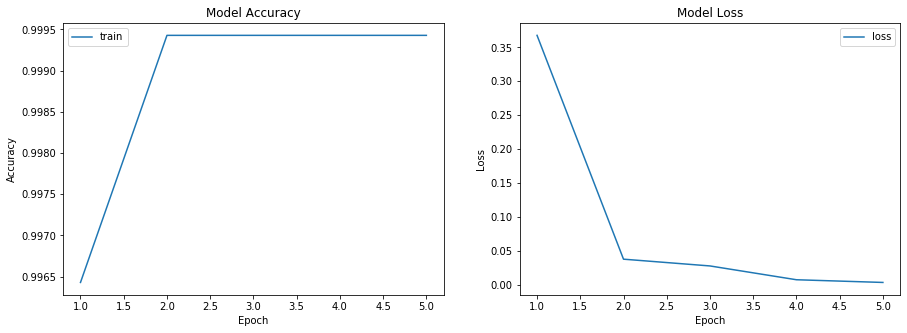

In [83]:
''' Plotting the training curves '''

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    ''' History for accuracy'''
    
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train'], loc='best')
    
    ''' History for loss'''
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['loss'], loc='best')
    plt.show()
    
plot_model_history(model_info)

- As the output of the model is binary (0 or 1), relu and sigmoid as the activation functions where they are considered to be more effective to deal with binary classification problems. 
- The model is shown to be learning at every epoch while minimizing the loss. These graphs make it easier to choose the number of epochs as after a certain level the loss will start moving up again. It is also used to tackle over fitting while training the models.

In [84]:
''' Predicting the test results and '''

y_pred = model.predict_classes(x_test)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test, y_pred), '\n')
print('Classification report', '\n', classification_report(y_test, y_pred), '\n')

Accuracy: 99.87
Confusion matrix 
 [[5992    0]
 [   8    0]] 

Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5992
           1       0.00      0.00      0.00         8

    accuracy                           1.00      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       1.00      1.00      1.00      6000
 



-  The model show high accuracy but poor F1 score of 0 for target variable, most likely due to highly imbalanced dataset.


Recommendations to apply synthetic minority over sampling technique (SMOTE) for imbalanced data
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


## Resampling using SMOTE

In [85]:
''' Redefine Splitting the data into training and test'''

x_train, x_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


Before OverSampling, counts of label '1': 8
Before OverSampling, counts of label '0': 13992 



In [86]:
'''resampling the training data'''
SM = SMOTE(random_state=42)
x_train_resample, y_train_resample = SM.fit_sample(x_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(x_train_resample.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_resample.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_resample==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resample==0)))


After OverSampling, the shape of X_train: (27984, 10)
After OverSampling, the shape of y_train: (27984,) 

After OverSampling, counts of label '1': 13992
After OverSampling, counts of label '0': 13992


In [87]:
''' Modelling '''
model = Sequential()
model.add(Dense(input_dim=10, output_dim = 6, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train_resample, y_train_resample, batch_size = 5, nb_epoch = 5)


Epoch 1/5
27984/27984 [==============================] - 3s 110us/step - loss: 0.1054 - accuracy: 0.9866
Epoch 2/5
27984/27984 [==============================] - 3s 107us/step - loss: 0.0148 - accuracy: 0.9980
Epoch 3/5
27984/27984 [==============================] - 3s 107us/step - loss: 0.0727 - accuracy: 0.9946
Epoch 4/5
27984/27984 [==============================] - 3s 107us/step - loss: 0.0047 - accuracy: 0.9992
Epoch 5/5
27984/27984 [==============================] - 3s 108us/step - loss: 0.0073 - accuracy: 0.9988


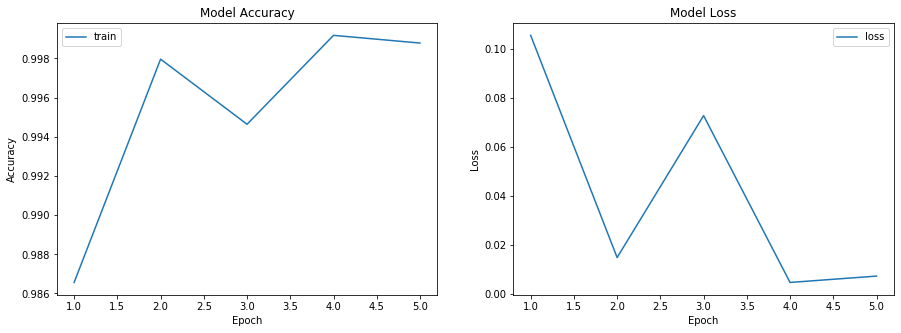

In [88]:
''' Plotting the training curves '''

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    ''' History for accuracy'''
    
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train'], loc='best')
    
    ''' History for loss'''
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['loss'], loc='best')
    plt.show()
    
plot_model_history(model_info)

In [89]:
''' Predicting the test results and '''

y_pred = model.predict_classes(x_test)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test, y_pred), '\n')
print('Classification report', '\n', classification_report(y_test, y_pred), '\n')

Accuracy: 99.85
Confusion matrix 
 [[5986    6]
 [   3    5]] 

Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5992
           1       0.45      0.62      0.53         8

    accuracy                           1.00      6000
   macro avg       0.73      0.81      0.76      6000
weighted avg       1.00      1.00      1.00      6000
 



- the target F1 score has just slighly improved from 0 to 0.53 with SMOTE

## Resampling with SMOTE and more weights to binary 1

In [90]:
''' Redefine Splitting the data into training and test'''

x_train, x_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 8
Before OverSampling, counts of label '0': 13992 



In [91]:
'''resampling the training data'''
SM = SMOTE(random_state=42)
x_train_resample, y_train_resample = SM.fit_sample(x_train, y_train)

print('After OverSampling, the shape of X_train: {}'.format(x_train_resample.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_resample.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_resample==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resample==0)))

After OverSampling, the shape of X_train: (27984, 10)
After OverSampling, the shape of y_train: (27984,) 

After OverSampling, counts of label '1': 13992
After OverSampling, counts of label '0': 13992


In [92]:
''' Modelling '''
model = Sequential()
model.add(Dense(input_dim=10, output_dim = 6, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train_resample, y_train_resample, batch_size = 5, nb_epoch = 5, class_weight ={0:0.2, 1:0.8})

Epoch 1/5
27984/27984 [==============================] - 3s 112us/step - loss: 0.0357 - accuracy: 0.9840
Epoch 2/5
27984/27984 [==============================] - 3s 113us/step - loss: 0.0024 - accuracy: 0.9986
Epoch 3/5
27984/27984 [==============================] - 3s 118us/step - loss: 0.0056 - accuracy: 0.9967
Epoch 4/5
27984/27984 [==============================] - 3s 112us/step - loss: 0.0075 - accuracy: 0.9961
Epoch 5/5
27984/27984 [==============================] - 3s 119us/step - loss: 0.0013 - accuracy: 0.9989


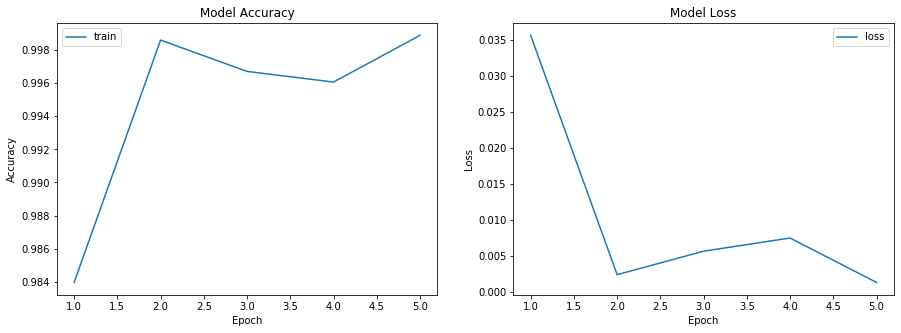

In [93]:
''' Plotting the training curves '''

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    ''' History for accuracy'''
    
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train'], loc='best')
    
    ''' History for loss'''
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['loss'], loc='best')
    plt.show()
    
plot_model_history(model_info)

In [94]:
''' Predicting the test results and '''

y_pred = model.predict_classes(x_test)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test, y_pred), '\n')
print('Classification report', '\n', classification_report(y_test, y_pred), '\n')

Accuracy: 99.78
Confusion matrix 
 [[5982   10]
 [   3    5]] 

Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5992
           1       0.33      0.62      0.43         8

    accuracy                           1.00      6000
   macro avg       0.67      0.81      0.72      6000
weighted avg       1.00      1.00      1.00      6000
 



- With SMOTE and higher weightage to target variable, the F1 score somehow reduced to 0.42, a workaround would be to increase epoch

## Limitations
- Dataset uses 1 step to represent 1 hour of time. Detailed transaction date and time could better predict and detect fraudulent transactions
- Lack of information on sender and receiver geographic location, which can be a useful feature to add for anomaly detection
- Difficult to obtain comprehensive transaction data from the web


## Conclusion


- Can Machine Learning and articificial intelligence help financial institutions spot money laundering more effectively? 
- As these deep learning models result suggests, it can do a good job with hypertuning.
- Machine Learning techniques cannot yet replace humans, and financial institutions are not ready to fully rely on machine learning softwares in particular those coming from commercial vendors, whose proprietory models are kept secret which  makes it difficult to assess their effectiveness.
- While machine learning models are fantastic at finding patterns, they don’t do it in a way that is easy to understand and explain to a regulator. Many of the machine learning models receiving the most buzz right now − neural networks, random forests and gradient boosting − are opaque approaches. The output of these models is complex to the point of being impractical to decipher. Techniques exist to reverse-engineer the output in a way to understand them better, but these models are still challenging to explain. (SAS® Viya® whitepaper)
- However, well-designed systems used as supplementary support can significantly improve the efficiency of detecting money laundering.